# Разные классификаторы, гиперпараметры, веса

## Данные

https://drive.google.com/open?id=1eDq0dDWM7601IPbr0lAbO3n9qZC1UYeO

Как обычно, сначала загрузим данные и посмотрим на них.

In [0]:
import pandas as pd

In [2]:
# для колаба:
# 1. запускаете эту ячейку
# 2. ждёте
# 3. внизу появляется кнопка с загрузкой с компьютера
# 4. выбираете файл на компьютере и загружаете
# 5. доооолго ждёте, пока он скачается -_-
from google.colab import files
uploaded = files.upload()

Saving news_lenta_cropped.csv to news_lenta_cropped.csv


In [0]:
df = pd.read_csv('news_lenta_cropped.csv')

In [4]:
df.head()

,title,topic
0,Грудь Бритни Спирс вновь выскочила из лифчика ...,Культура
1,Попытка вернуть укатившийся мяч у Кремлевской ...,Силовые структуры
2,Хабенский стал врагом Украины,Культура
3,В Туркмении запретили продажу алкоголя,Бывший СССР
4,В Великобритании нашли утерянный сценарий Стен...,Культура


In [5]:
len(df)

129930

In [7]:
df.iloc[1].title

'Попытка вернуть укатившийся мяч у\xa0Кремлевской стены вылилась в\xa0штраф'

### Задание 1

Сколько всего значений принимает `topic`? Сколько объектов относится к каждому из топиков?

In [8]:
set(df.topic)

{'Бывший СССР', 'Культура', 'Силовые структуры', 'Ценности'}

In [0]:
from collections import Counter

In [13]:
Counter(df.topic) # сколько каких топиков

Counter({'Бывший СССР': 52018,
         'Культура': 52600,
         'Силовые структуры': 18480,
         'Ценности': 6832})

In [27]:
df.topic.value_counts() # ещё один способ посчитать, сколько чего есть

Культура             52600
Бывший СССР          52018
Силовые структуры    18480
Ценности              6832
Name: topic, dtype: int64

In [26]:
df.title[df.topic == 'Ценности'].iloc[20]

'Стильная жилетка тренера английской сборной спасет больных раком'

## Baseline

Посмотрим, как с классификацией справится наивный байес и CountVectorizer с дефолтными настройками.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [0]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df.title)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(bow, df.topic)

In [17]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, nb.predict(X_test)))

                   precision    recall  f1-score   support

      Бывший СССР       0.92      0.97      0.94     12986
         Культура       0.96      0.94      0.95     13162
Силовые структуры       0.90      0.86      0.88      4661
         Ценности       0.94      0.78      0.85      1674

         accuracy                           0.93     32483
        macro avg       0.93      0.89      0.91     32483
     weighted avg       0.93      0.93      0.93     32483



### Задание 2

Попробуйте `TfidfVectorizer`. Попробуйте разные значения `min_df` и `max_df`.

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer()
tfidf_vecs = vectorizer.fit_transform(df.title)

In [37]:
tfidf_vecs

<129930x89121 sparse matrix of type '<class 'numpy.float64'>'
	with 886475 stored elements in Compressed Sparse Row format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vecs, df.topic)

In [40]:
nb = MultinomialNB() 
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
print(classification_report(y_test, nb.predict(X_test)))

                   precision    recall  f1-score   support

      Бывший СССР       0.83      0.98      0.90     12938
         Культура       0.91      0.95      0.93     13235
Силовые структуры       0.98      0.57      0.72      4594
         Ценности       1.00      0.38      0.55      1716

         accuracy                           0.88     32483
        macro avg       0.93      0.72      0.77     32483
     weighted avg       0.89      0.88      0.87     32483



## LogReg и веса классов

In [0]:
two_classes = df[(df.topic == 'Культура') | (df.topic == 'Бывший СССР')]

In [44]:
len(two_classes)

104618

In [45]:
two_classes.head()

,title,topic
0,Грудь Бритни Спирс вновь выскочила из лифчика ...,Культура
2,Хабенский стал врагом Украины,Культура
3,В Туркмении запретили продажу алкоголя,Бывший СССР
4,В Великобритании нашли утерянный сценарий Стен...,Культура
5,Сотня горняков под Луганском оказалась заблоки...,Бывший СССР


In [0]:
from sklearn.linear_model import LogisticRegression

In [47]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(two_classes.title)
X_train, X_test, y_train, y_test = train_test_split(bow, two_classes.topic)
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
classification_report?

In [48]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

 Бывший СССР       0.98      0.97      0.98     12953
    Культура       0.98      0.98      0.98     13202

    accuracy                           0.98     26155
   macro avg       0.98      0.98      0.98     26155
weighted avg       0.98      0.98      0.98     26155



In [51]:
bow

<104618x75335 sparse matrix of type '<class 'numpy.int64'>'
	with 702352 stored elements in Compressed Sparse Row format>

In [50]:
clf.coef_

(1, 75335)

In [0]:
new_vector = vectorizer.transform(['ссср евровидение', 'тимошенко'])

In [83]:
clf.predict(new_vector)

array(['Культура', 'Бывший СССР'], dtype=object)

In [77]:
clf.predict_proba(new_vector)

array([[0.02730997, 0.97269003]])

### Задание

Найдите самый значимый признак.

In [79]:
clf.coef_.shape

(1, 75335)

In [54]:
max(clf.coef_[0]) # cсамый большой коэффициент

3.511615325844646

In [60]:
max(enumerate(clf.coef_[0]), key=lambda pair: pair[1]) # получили максимальный коэф + порядковый номер

(19827, 3.511615325844646)

In [65]:
# как работает .items()
a = {1: 'fghjk', 3: 'dfghj'}
a.items()

dict_items([(1, 'fghjk'), (3, 'dfghj')])

In [0]:
index_to_word = {
    ind: word
    for (word, ind)
    in vectorizer.vocabulary_.items()
    }

In [66]:
index_to_word[19827]

'евровидение'

In [80]:
# минимальный вес признака
min(enumerate(clf.coef_[0]), key=lambda pair: pair[1])

(65552, -5.094295252145971)

In [81]:
index_to_word[65552]

'тимошенко'

In [85]:
# первые 10 коэффициентов
top_features = sorted(enumerate(clf.coef_[0]), key=lambda pair: pair[1], reverse=True)[:10]
for index, value in top_features:
  print(index_to_word[index])

евровидение
евровидения
сериал
евровидении
сыграет
альбом
фильм
фильма
концерта
кино


## Подбор параметров

### Вручную

In [0]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df.title)
X_train, X_test, y_train, y_test = train_test_split(bow, df.topic)

In [92]:
lr = LogisticRegression(C=5, penalty='l2', random_state=42)
clf = lr.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                   precision    recall  f1-score   support

      Бывший СССР       0.96      0.96      0.96     12898
         Культура       0.94      0.97      0.95     13251
Силовые структуры       0.92      0.87      0.90      4622
         Ценности       0.93      0.80      0.86      1712

         accuracy                           0.94     32483
        macro avg       0.94      0.90      0.92     32483
     weighted avg       0.94      0.94      0.94     32483



### В цикле

### Grid Search

Самый продвинутый и out-of-box способ делать это.

In [0]:
from sklearn.model_selection import GridSearchCV

In [94]:
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Confusion matrix

In [103]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(two_classes.title)
X_train, X_test, y_train, y_test = train_test_split(bow, two_classes.topic)
nb = LogisticRegression()
nb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test, nb.predict(X_test))

array([[12835,   357],
       [  281, 12682]])

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

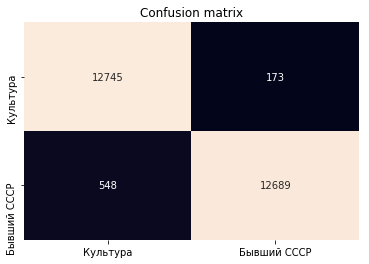

In [0]:
categories = ['Культура', 'Бывший СССР']
sns.heatmap(data=confusion_matrix(y_test, nb.predict(X_test)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

### Задание:
Нарисуйте то же самое для 4 классов.

In [98]:
confusion_matrix(y_test, lr.predict(X_test))

array([[12401,   277,   205,    15],
       [  224, 12846,   117,    64],
       [  315,   258,  4031,    18],
       [   30,   287,    31,  1364]])

In [99]:
lr.classes_

array(['Бывший СССР', 'Культура', 'Силовые структуры', 'Ценности'],
      dtype=object)

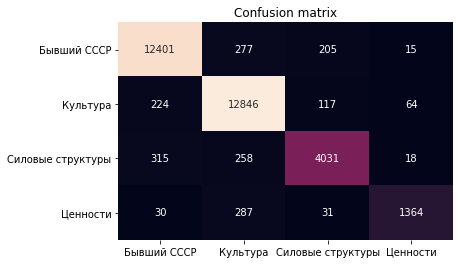

In [101]:
categories = ['Бывший СССР', 'Культура', 'Силовые структуры', 'Ценности']
sns.heatmap(data=confusion_matrix(y_test, lr.predict(X_test)), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

### А теперь давайте попробуем другие классификаторы

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Задание:
Попробуйте kNN с разным количеством соседей.

### Задание:
Попробуйте все классификаторы и поиграйте с их гиперпараметрами.